<h1 style="text-align: center;">AAE 590 Surrogate Methods</h1>

## Local Unconstrained Optimization

This notebook supports material covered in the class for local *unconstrained* optimization. We will be using `scipy.optimize` module for minimizing example functions mentioned below.

1. [Bean Function](#Bean-Function)</br>
2. [Rosenbrock Function](#Rosenbrock-Function)

Going through the following documentation will help in understanding the code:

1. [Scipy minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
2. [Matplotlib Contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

<font color='red'>**Please run the below block of code before you run any other block**</font> - it imports all the packages needed for this notebook. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.colors as colors

### Bean Function

Consider the bean function described below.

$$
    f(x_1,x_2) = (1 - x_1)^2 + (1 - x_2)^2 + \frac{1}{2}(2x_2 - x_1^2)^2
$$

**Question**: Plot the function contours.

**Answer**: Below block of code defines a function which returns value of bean function at any given $x$. Read comments for more details.

In [44]:
def bean_function(x1, x2):
    """
        Function which calculates the bean function value at given x.
        
        Input:
        x1 - first variable in bean function. Can be an int, float, or numpy array.
        x2 - second variable in bean function. Can be an int, float, or numpy array.
        
        Note: size and type of both the inputs should be same.
    """
    
    value = (1 - x1)**2 + (1 - x2)**2 + (2*x2 - x1**2)**2 / 2
    
    return value

Below block of code makes a contour plot of bean function using the function defined in previous block. Read comments for more details.

Text(0.5, 1.0, 'Bean Function')

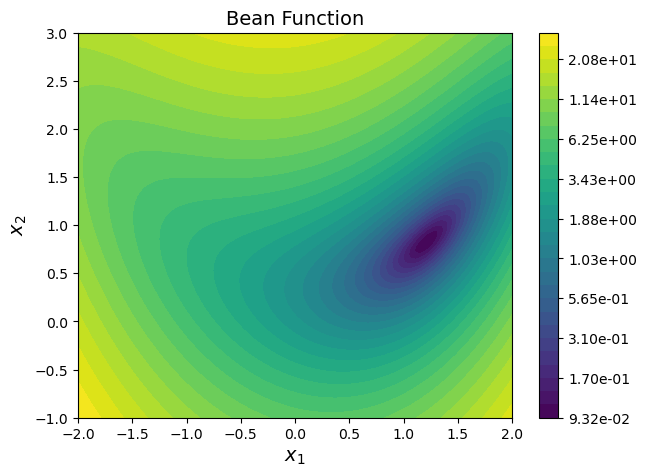

In [45]:
# Defining x and y values
x = np.linspace(-2,2,100)
y = np.linspace(-1,3,100)

# Creating a mesh at which values and 
# gradient will be evaluated and plotted
X, Y = np.meshgrid(x, y)

# Evaluating the function values at meshpoints
Z = bean_function(X,Y)

# Contour levels are evaluated in logscale since the difference
# between minimum and maximum value of function is large.
noOfLevels = 30
levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

# Defining normalization which is used to normalize the function values
# before mapping with color. We need to use this since levels for contour
# is defined on log scale
norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

# Plotting the filled contours
fig, ax = plt.subplots(figsize=(7,5))
CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
fig.colorbar(CS, format='%.2e', orientation='vertical')
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Bean Function", fontsize=14)

**Question**: Use *Conjugate Gradient* and *BFGS* method for minimizing this function.

**Answer**: Below block of code defines three functions which are used irrespective of the solver. First two are used during the optimization and last one is used for plotting the optimization convergence results. Read comments in the function for more details.

In [47]:
def bean_obj_func(x) -> float:
    """
        Function given to optimizer. Bean function is not used 
        directly since scipy.minimize needs objective function 
        in different format.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    return bean_function(x[0], x[1])

def bean_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value which is later
        for plotting convergence history.
        
        Input: 1d numpy array which contains current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(bean_obj_func(x))
    
def bean_func_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dictionary which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A string which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1
    
    # Defining x and y values
    x = np.linspace(-2,2,100)
    y = np.linspace(-1,3,100)

    # Creating a mesh at which values 
    # will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = bean_function(X,Y)

    # Plotting the convergence history
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax.plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax.plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_xlim(left=0, right=num_itr)
    ax.set_ylabel("Quantities", fontsize=14)
    ax.grid()
    ax.legend(fontsize=12)
    ax.set_title("Convergence history - " + method, fontsize=14)
    
    # Levels are evaluated in logscale since the difference
    # between minimum and maximum value is large.
    noOfLevels = 30
    levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)
    
    # Defining normalization which is used to normalize the function values
    # before mapping with color. We need to use this since levels for contour
    # is defined on log scale
    norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

    # Plotting the filled contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
    fig.colorbar(CS, format='%.2e', orientation='vertical')
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.scatter(x0[0], x0[1], label="Starting point", c="red")
    ax.scatter(result.x[0], result.x[1], label="Final point", c="orange")
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Path of optimizer - " + method, fontsize=14)
    ax.legend()

    plt.show()

Below block of code defines various parameters for optimization using **Conjugate Gradient** method.

Optimization terminated successfully.
         Current function value: 0.091944
         Iterations: 10
         Function evaluations: 54
         Gradient evaluations: 18
Value of x1 at optimum: 1.2134116299783557
Value of x2 at optimum: 0.8241225860738051


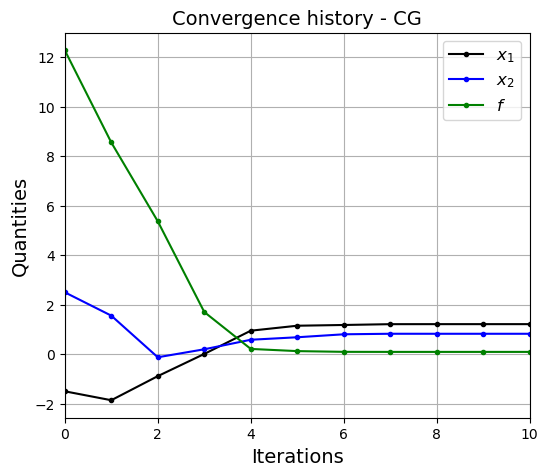

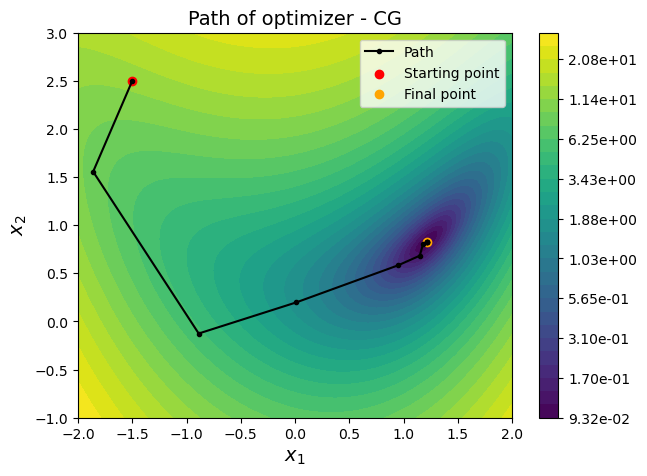

In [48]:
# Starting point
x0 = np.array([-1.5, 2.5])

# Solver
method = "CG"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [bean_obj_func(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=bean_obj_func, x0=x0, method=method, jac=jac, callback=bean_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
bean_func_opt_plots(history, method=method)

Below block of code defines various parameters for optimization using **BFGS** method.

Optimization terminated successfully.
         Current function value: 0.091944
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 12
Value of x1 at optimum: 1.2134128613449735
Value of x2 at optimum: 0.8241227622072955


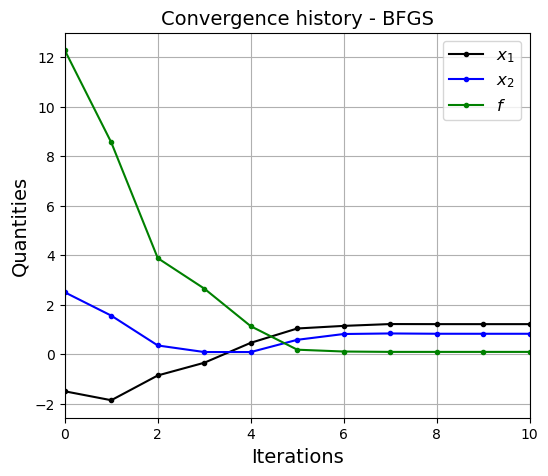

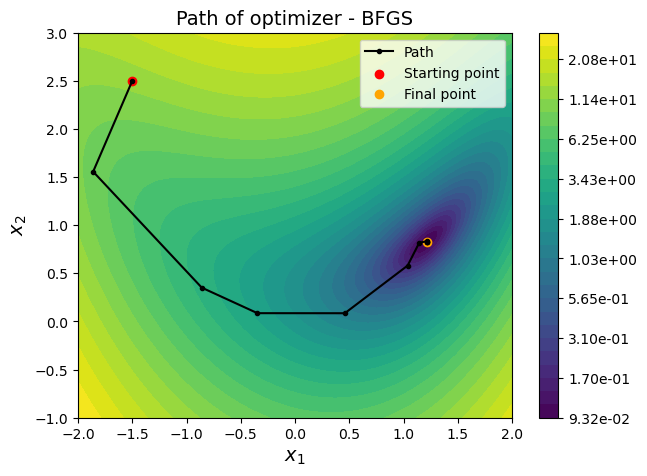

In [49]:
# Starting point
x0 = np.array([-1.5, 2.5])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [bean_obj_func(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=bean_obj_func, x0=x0, method=method, jac=jac, callback=bean_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
bean_func_opt_plots(history, method=method)

### Rosenbrock Function

Consider the **rosenbrock function** described below.

$$
    f(x_1,x_2) = (a - x_1)^2 + b(x_2 - x_1^2)^2
$$

Typically, $a$ is set to 1 and $b$ is set to 100.

**Question**: Plot the function contours.

**Answer**: Below block of code defines a function which returns value of bean function at any given $x$.

In [50]:
def rosenbrock_function(x1, x2):
    """
        Function which calculates the rosenbrock function value at given x.
        
        Input:
        x1 - first variable in rosenbrock function. Can be an int, float, or numpy array.
        x2 - second variable in rosenbrock function. Can be an int, float, or numpy array.
        
        Note: size and type of both the inputs should be same.
    """
    
    a = 1
    b = 100
    
    value = (a - x1)**2 + b*(x2 - x1**2)**2
    
    return value

Below block of code makes a contour plot of rosenbrock function using the function defined in previous block.

Text(0.5, 1.0, 'Rosenbrock Function')

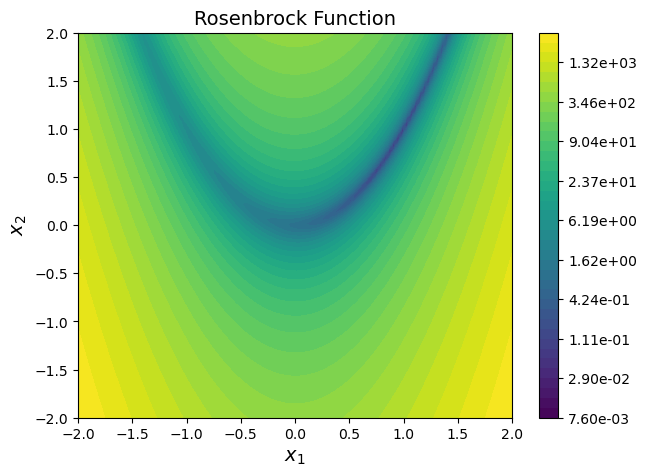

In [51]:
# Defining x and y values
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

# Creating a mesh at which values and 
# gradient will be evaluated and plotted
X, Y = np.meshgrid(x, y)

# Evaluating the function values at meshpoints
Z = rosenbrock_function(X,Y)

# Contour levels are evaluated in logscale since the difference
# between minimum and maximum value of function is large.
noOfLevels = 40
levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

# Defining normalization which is used to normalize the function values
# before mapping with color. We need to use this since levels for contour
# is defined on log scale
norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

# Plotting the filled contours
fig, ax = plt.subplots(figsize=(7,5))
CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
fig.colorbar(CS, format='%.2e', orientation='vertical')
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Rosenbrock Function", fontsize=14)

**Question**: Use *conjugate gradient* and *BFGS* method for minimizing the rosenbrock function.

**Answer**: Below block of code defines three functions which are used irrespective of the solver. First two are used during the optimization and last one is used for plotting the optimization convergence results. Read comments in the function for more details.

In [52]:
def rosen_obj_func(x) -> float:
    """
        Function given to optimizer. Rosenbrock function
        is not used directly since scipy.minimize needs objective
        function in different format.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    return rosenbrock_function(x[0], x[1])

def rosen_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value.
        
        Input: Current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(rosen_obj_func(x))
    
def rosen_func_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dict which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A str which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1
    
    # Defining x and y values
    x = np.linspace(-2,2,100)
    y = np.linspace(-2,2,100)

    # Creating a mesh at which values 
    # will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = rosenbrock_function(X,Y)

    # Plotting the convergence history
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    # DV history
    ax[0].plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax[0].plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax[0].set_xlabel("Iterations", fontsize=14)
    ax[0].set_xlim(left=0, right=num_itr)
    ax[0].set_ylabel("$x_1$ and $x_2$", fontsize=14)
    ax[0].grid()
    ax[0].legend(fontsize=12)
    
    # function history
    ax[1].plot(np.arange(num_itr+1), history["f"], "b", marker=".", label="$f$")
    ax[1].set_xlabel("Iterations", fontsize=14)
    ax[1].set_xlim(left=0, right=num_itr)
    ax[1].set_yscale('log')
    ax[1].set_ylabel("$y$", fontsize=14)
    ax[1].grid()
    
    fig.suptitle("Convergence history - " + method, fontsize=14)

    # Plotting path of optimizer
    fig, ax = plt.subplots(figsize=(7,5))
    
    # Levels
    noOfLevels = 30
    levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)
    norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())
    
    CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
    fig.colorbar(CS, format='%.2e', orientation='vertical')
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.scatter(x0[0], x0[1], label="Starting point", c="red")
    ax.scatter(result.x[0], result.x[1], label="Final point", c="orange")
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Path of optimizer - " + method, fontsize=14)
    ax.legend()

    plt.show()

Below block of code defines various parameters for optimization using **Conjugate Gradient** method.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 216
         Gradient evaluations: 72
Value of x1 at optimum: 0.999995525407976
Value of x2 at optimum: 0.9999910236713435


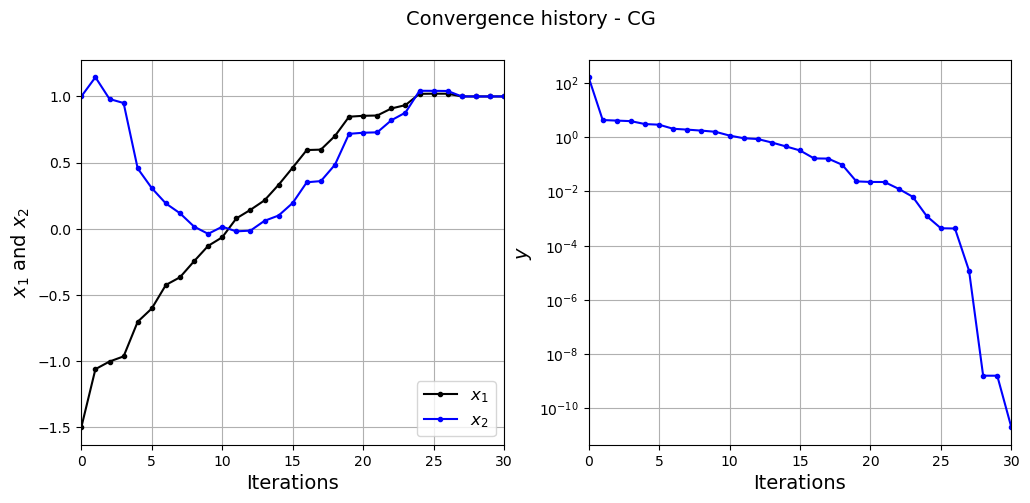

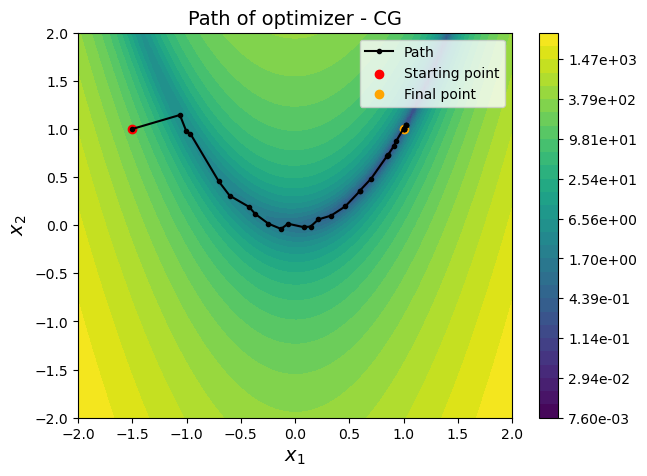

In [53]:
# Starting point
x0 = np.array([-1.5, 1.0])

# Solver
method = "CG"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [rosen_obj_func(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=rosen_obj_func, x0=x0, method=method, jac=jac, callback=rosen_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
rosen_func_opt_plots(history, method=method)

Below block of code defines various parameters for optimization using **BFGS** method.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 99
         Gradient evaluations: 33
Value of x1 at optimum: 0.9999955487967556
Value of x2 at optimum: 0.9999910897532556


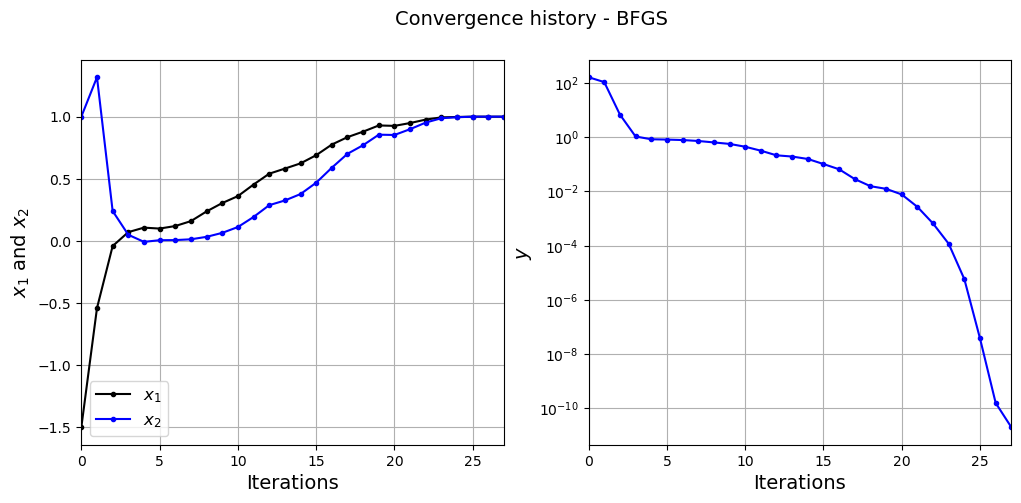

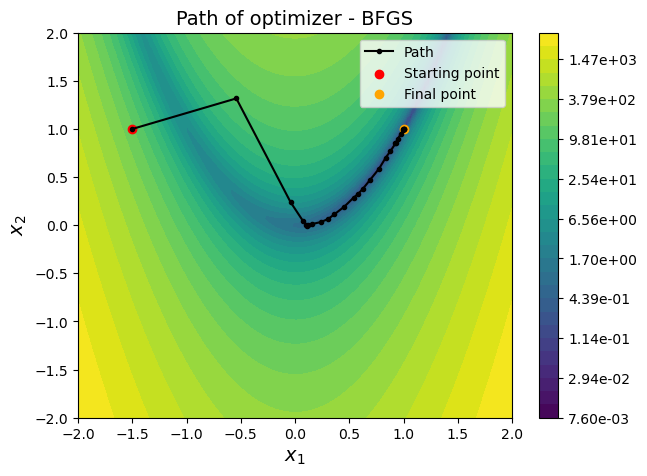

In [56]:
# Starting point
x0 = np.array([-1.5, 1.0])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [rosen_obj_func(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=rosen_obj_func, x0=x0, method=method, jac=jac, callback=rosen_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
rosen_func_opt_plots(history, method=method)

**Conclusion**:

* The number of iterartions taken by CG is more than BFGS when all other settings are same.
* Function evaluations is greater than number of iterations since gradient is evaluated using finite difference. You can also provide python function which outputs analytical gradient values to optimizer which will decrease the function evaluations.
* When you change `jac` to "3-point", you will notice that number of function evaluations increases since central difference requries more function evaluations.
* The 1st step in *BFGS* is same as 1st step of *CG* for the same starting point.
* You can also use other methods like *Newton-CG*, but you will need to give exact values of gradient vector and it will compute hessian matrix using finite difference techniques.

Feel free to play around with various settings and see how final answer and path of the optimizer changes. Note that when you change the sta